In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re

In [3]:
import pandas as pd
df = pd.read_csv('novartis_crawl_data.csv')
df = df[['url', 'metadata/description', 'metadata/openGraph/3/content', 'text', 'markdown']]
df.head(5)

/var/folders/7r/c2nc74jn3nl4pqz_qsx8d_jw0000gn/T/ipykernel_59924/2762550742.py:2: DtypeWarning: Columns (11,12,14,18,20,21,24,25,27,29,31,32,33,34,36,37,39,40,41,42,43,44,46,49,52,54,55,56,57,58,61,62,63,64,67,68,69,76,88,110,111,112,114,115,116,119,122,124,125,126,127,128,129,130,131,132,133,134,135,136,139,140,141,142,143,144,145,146,147,148,149,150,153,154,155,167,168,169,170,171,172,173,174,180,202,203,204,206,207,210,214,223,225,226,227,228,229,231,232,234,235,236,237,238,239,240,241,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('novartis_crawl_data.csv')


,url,metadata/description,metadata/openGraph/3/content,text,markdown
0,https://www.novartis.com/,"Working together, we can reimagine medicine to...",Novartis,My Cancer. My Words. \nIn a world where about ...,## My Cancer. My Words.\n\nIn a world where ab...
1,https://en.wikipedia.org/wiki/Novartis,NaN,https://upload.wikimedia.org/wikipedia/commons...,Novartis AG\n\t\nHeadquarters in Basel\n\t\nCo...,Novartis AG\n\n[![](https://upload.wikimedia.o...
2,https://www.novartisfoundation.org/,Transforming population health through data an...,NaN,Advancing digital and data-led approaches to p...,## Advancing digital and data-led approaches t...
3,https://www.novartis.com/research-development/...,NaN,Research and development | Novartis,We are an innovative medicines company with re...,We are an innovative medicines company with re...
4,https://www.novartis.com/news/media-releases/n...,NaN,Novartis announces planned acquisition of Endo...,Novartis to acquire Endocyte to accelerate dev...,* _Novartis to acquire Endocyte to accelerat...


90th percentile: nan


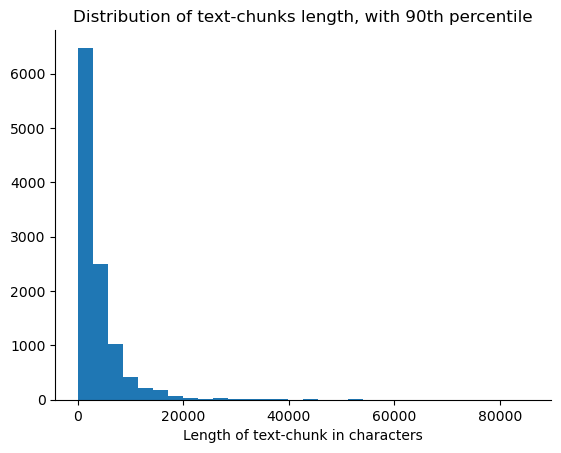

In [4]:
import numpy as np
from matplotlib import pyplot as plt

chunk_sizes = df['text'].str.len()
percentile_90th = np.percentile(chunk_sizes, 90)
print('90th percentile:', percentile_90th)
plt.hist(chunk_sizes, bins=30)
plt.title('Distribution of text-chunks length, with 90th percentile')
plt.xlabel('Length of text-chunk in characters')
plt.axvline(x = percentile_90th, color = 'red', linestyle = '--', alpha = 0.5)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show();

In [5]:
df.drop(df[df['text'].str.contains('Page not found \(404\)')].index, inplace=True)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [10]:
df.drop(df[df["text"].isnull()].index, inplace=True)

In [13]:
df['text_length'] = df['text'].str.len()
indexes_to_drop = df.sort_values('text_length').iloc[:70].index

In [23]:
df.drop(indexes_to_drop, inplace=True)

In [25]:
rows_indexes_to_truncate = df[df['text_length'] > 6000].index

In [27]:
df.loc[rows_indexes_to_truncate, 'text'] = df.loc[rows_indexes_to_truncate, 'text'].str[:6000]

In [28]:
df.loc[rows_indexes_to_truncate, 'markdown'] = df.loc[rows_indexes_to_truncate, 'markdown'].str[:7000]

In [29]:
df['text_length'] = df['text'].str.len()

In [30]:
chunk_sizes = df['text_length']

Num of chunks: 10985
50th percentile: 2121.0


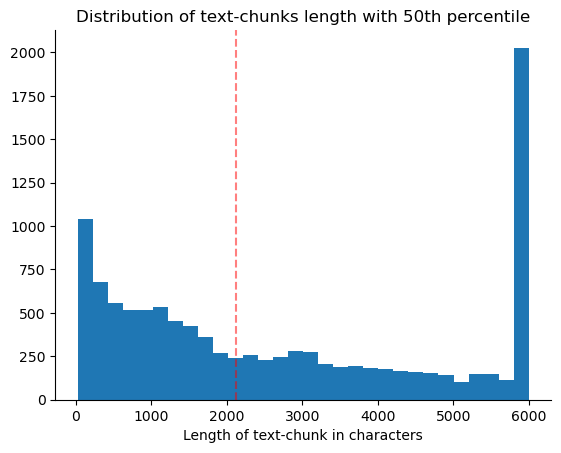

In [31]:
percentile_50th = np.percentile(chunk_sizes, 50)
print('Num of chunks:', len(chunk_sizes))
print('50th percentile:', percentile_50th)
plt.hist(chunk_sizes, bins=30)
plt.axvline(x = percentile_50th, color = 'red', linestyle = '--', alpha = 0.5)
plt.title('Distribution of text-chunks length with 50th percentile')
plt.xlabel('Length of text-chunk in characters')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show();

In [34]:
# df.reset_index(inplace=True)
# df.drop([ 'index'], axis=1, inplace=True)

In [37]:
df.columns

Index(['url', 'metadata/description', 'metadata/openGraph/3/content', 'text',
       'markdown', 'text_length'],
      dtype='object')

In [39]:
# Writing cleaned texts into txt file with ######## delimeter 
with open('dataset_novartis.txt', 'w', encoding="utf-8") as out:
    for idx in df.index:
        link = df.loc[idx,'url']
        text = df.loc[idx,'text']
        paragraph_text = text + '\Details in the link: ' + link
        out.write(paragraph_text + '\n########')